In [375]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.signal import find_peaks
import polyfit as pf
from adjustText import adjust_text


## Para la muestra 3

In [376]:
x_data, y_data = pf.read_xy_file('Unknown-sample-03_PD.xy') 
disp_array, _ = pf.read_xy_file('PicosUS3.xy')
peaks_idx = np.searchsorted(x_data, disp_array)

In [377]:
# (self, x_data, y_data, disp_array, fitness_model='chi_squared', wavelet_level=5, wavelet_threshold=1, wavelet='sym8',
# perform_wavelet=False, P2_bound=[-0.000001, 0], Q_bound=[-0.000001, 0.000001], R_bound=[0, 0.3],
# H_bound=[0, 1.5], eta_bound=[0, 1], A_multiplier=[0.75, 1.05], disp_deviation=1, max_num_iteration = 1000,
# population_size = 20, mutation_probability = 0.15, elit_ratio = 0.2, crossover_probability = 0.5, parents_portion = 0.3,
# crossover_type = 'uniform', max_iteration_without_improv = None):

# All custom fitness functions that can be used
# 'rwp'
# 'huber'
# 'rmse'
# 'mse'
# 'mae'
# 'msle' 
# 'logcosh'
# 'chi_squared'

analysis = pf.PolyFit(x_data, y_data, disp_array, fitness_model='chi_squared',
                      A_multiplier=[0.01, 0.2],
                      H_bound=[0.05, 0.25],
                      disp_deviation=0.01,
                      max_num_iteration = 1000,
                      population_size = 20)

In [378]:
#best_params, FWHM, angles, index, bkg_parameters, etas, Intensity  = analysis.run_analysis()
#np.save('best_params_US3_2.npy', best_params)

In [379]:
# Usar si no se va a correr el algoritmo genetico
best_params = np.load('best_params_US3_1.npy')
best_params, FWHM, angles, index, *_ = analysis.return_parameters(best_params, radians=True)

X^2 = 12.648


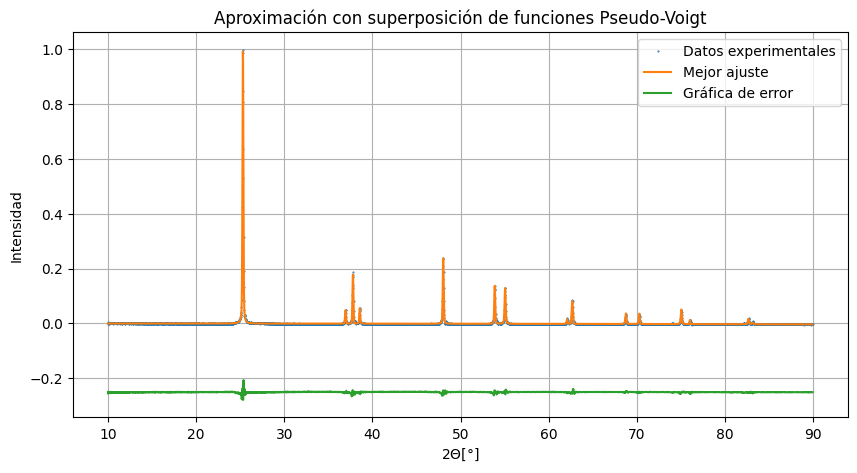

In [380]:
y_best_fit = pf.FitnessFunctions.model2(x_data, best_params,disp_array)
R = best_params[2]

chi2 = pf.FitnessFunctions.chi_squared_fitness(best_params,x_data, y_data, np.std(y_data), disp_array)
print(f'X^2 = {chi2:.3f}')
pf.PolyFit.polyGraph(x_data, y_data, y_best_fit, R = R)

Skipping line: GENERAL$
Skipping line: 11900


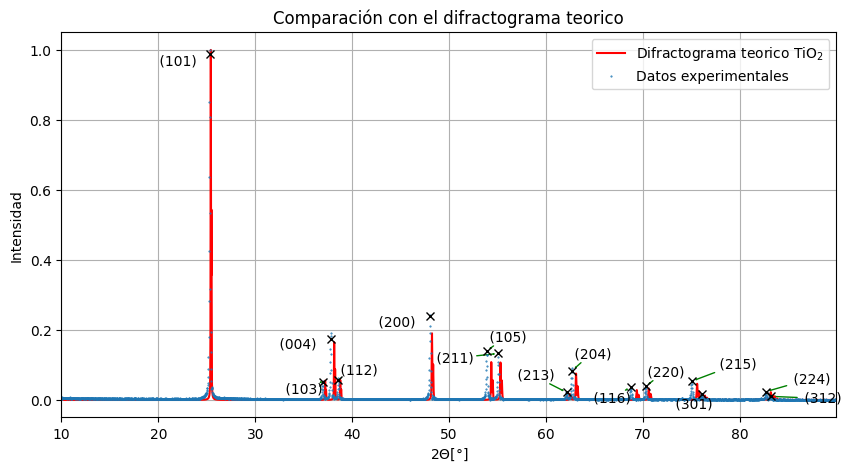

In [381]:
x_data_theo, y_data_theo = pf.read_xy_file2('TiO2.xy')

TiO2_h = np.array([1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 3])
TiO2_k = np.array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1])
TiO2_l = np.array([1, 3, 4, 2, 0, 5, 1, 3, 4, 6, 0, 5, 1, 4, 2])

miller_Index_TiO2 = pf.concatenate_indices(TiO2_h, TiO2_k, TiO2_l)

plt.figure(figsize=(10, 5))

#plt.plot(x_data, I_aprox, '-', label='Mejor ajuste')
plt.plot(x_data_theo, y_data_theo, 'r-', label='Difractograma teorico TiO$_2$')
plt.plot(x_data, y_data, 'o', label='Datos experimentales', markersize=0.5)

texts = []
for idx, label in zip(peaks_idx, miller_Index_TiO2):
    plt.plot(x_data[idx], y_data[idx], "kx")  #
    # Store text objects in a list for adjustment
    text = plt.text(x_data[idx], y_data[idx], ' {}'.format(label), color='black', ha='right', va='top')
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green'))

plt.xlim([np.min(x_data),np.max(x_data)])
plt.xlabel('$2\Theta [°]$')
plt.ylabel('Intensidad')
plt.title('Comparación con el difractograma teorico')
plt.grid()
plt.legend()
plt.show()


### Tamaño de la cristalita con Scherrer 

In [382]:
Cristalite, Cristalite_sizes = pf.PolyFit.Scherrer(angles,FWHM)

print(f'El tamaño de la cristalita es de {np.mean(Cristalite):.3f} nm')
print(f'desviacion estandar {np.std(Cristalite_sizes):.4f} nm')

El tamaño de la cristalita es de 74.747 nm
desviacion estandar 14.2234 nm


### Deformación con Halder Wagner

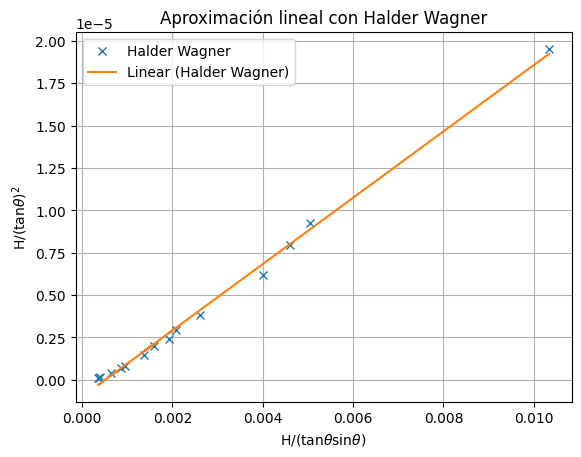

R^2: 0.9963566975493869
La defromación es de 0.025%
El tamaño de la cristalina es 78.714 nm


In [383]:
strain, size,R2 = pf.PolyFit.Halder_Wagner(angles,FWHM)

print("R^2:", R2)
print(f'La defromación es de {strain:.3f}%')
print(f'El tamaño de la cristalina es {size:.3f} nm')

### Implementación de Warren Averbach

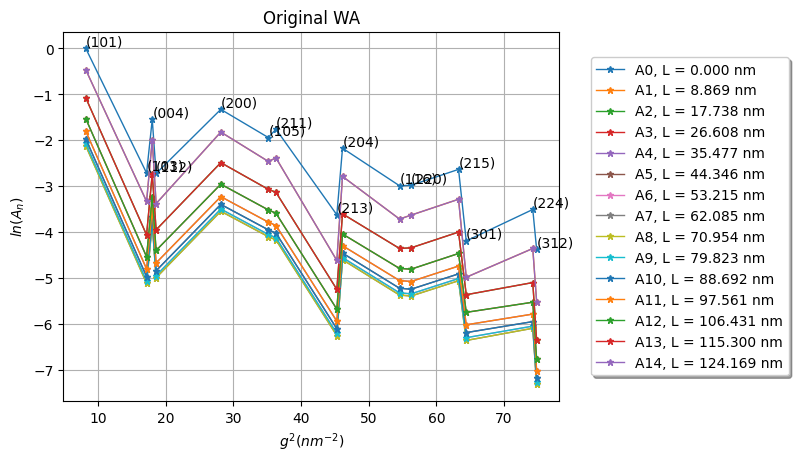

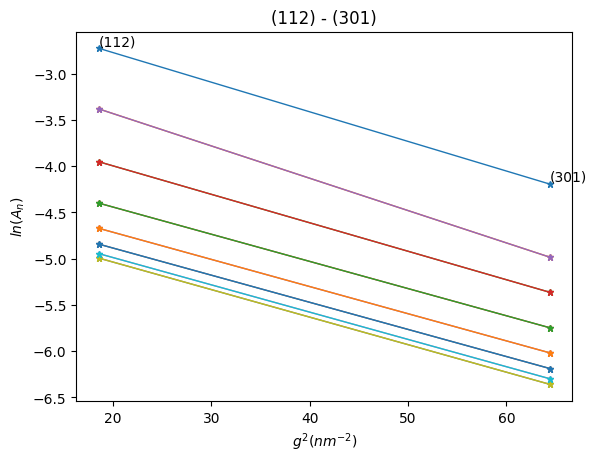

El porcentaje de deformación es de 0.1551%


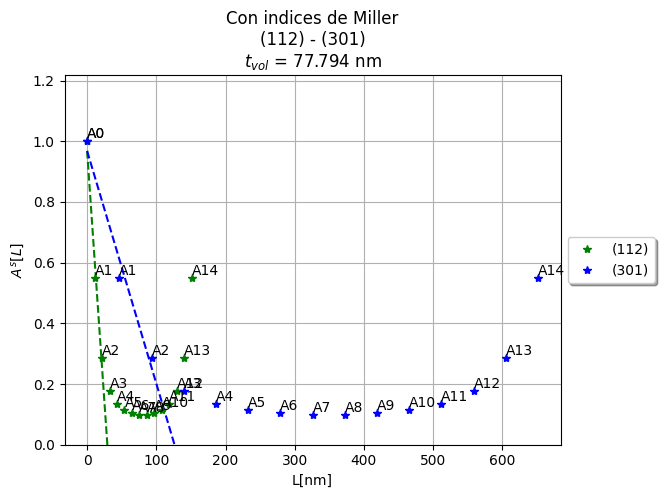

In [384]:
### Conociendo los indices de Miller y los parametros de Celda

x_Pv = np.linspace(np.min(x_data),np.max(x_data), num=5000)
y_Pv = pf.FitnessFunctions.model2(x_Pv, best_params,disp_array)

abc = np.array([3.771,3.771,9.43])*0.1 #Use nm
ABG = np.array([90,90,90])*np.pi/180 #For Warren Averbach module use rads
hkl = np.array([TiO2_h,TiO2_k,TiO2_l]) 

strain_pair = analysis.Warren_Averbach(angles,FWHM, [3,12], hkl = hkl, ABG = ABG,abc = abc, x_data=x_Pv, y_data=y_Pv, n=15)
#analysisUS4.Warren_Averbach(angles,FWHM, [6,13],n=10)

strain = np.sqrt(np.mean(strain_pair[1:])) * 100
print(f'El porcentaje de deformación es de {strain:.4f}%')

## Para la muestra 4

In [385]:
x_data, y_data = pf.read_xy_file('Unknown-sample-04_PD.xy') 
disp_array, _ = pf.read_xy_file('PicosUS4.xy')
peaks_idx = np.searchsorted(x_data, disp_array)

In [386]:
# (self, x_data, y_data, disp_array, fitness_model='chi_squared', wavelet_level=5, wavelet_threshold=1, wavelet='sym8',
# perform_wavelet=False, P2_bound=[-0.000001, 0], Q_bound=[-0.000001, 0.000001], R_bound=[0, 0.3],
# H_bound=[0, 1.5], eta_bound=[0, 1], A_multiplier=[0.75, 1.05], disp_deviation=1, max_num_iteration = 1000,
# population_size = 20, mutation_probability = 0.15, elit_ratio = 0.2, crossover_probability = 0.5, parents_portion = 0.3,
# crossover_type = 'uniform', max_iteration_without_improv = None):

# All custom fitness functions that can be used
# 'rwp'
# 'huber'
# 'rmse'
# 'mse'
# 'mae'
# 'msle' 
# 'logcosh'
# 'chi_squared'

analysisUS4 = pf.PolyFit(x_data, y_data, disp_array, fitness_model='chi_squared',
                      A_multiplier=[0.3, 0.6],
                      H_bound=[0.4, 0.5],
                      disp_deviation=0.01,
                      max_num_iteration = 1000,
                      population_size = 20)

In [387]:
# best_params, FWHM, angles, index, bkg_parameters, etas, Intensity  = analysisUS4.run_analysis()
# np.save('best_params_US4_1.npy', best_params)

In [388]:
# Usar si no se va a correr el algoritmo genetico
best_params = np.load('best_params_US4_1.npy')
best_params, FWHM, angles, index, *_ = analysis.return_parameters(best_params, radians=True)

X^2 = 16.757


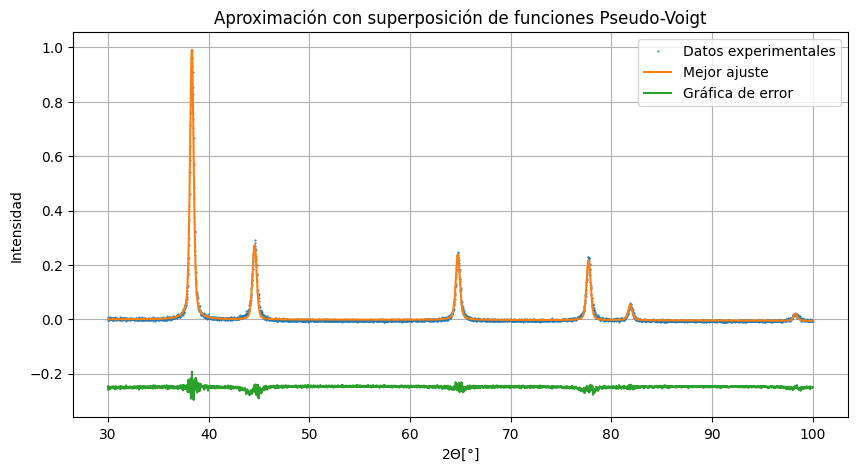

In [389]:
y_best_fit = pf.FitnessFunctions.model2(x_data, best_params,disp_array)
R = best_params[2]

chi2 = pf.FitnessFunctions.chi_squared_fitness(best_params,x_data, y_data, np.std(y_data), disp_array)
print(f'X^2 = {chi2:.3f}')

pf.PolyFit.polyGraph(x_data, y_data, y_best_fit, R = R)

Skipping line: GENERAL$
Skipping line: 11900


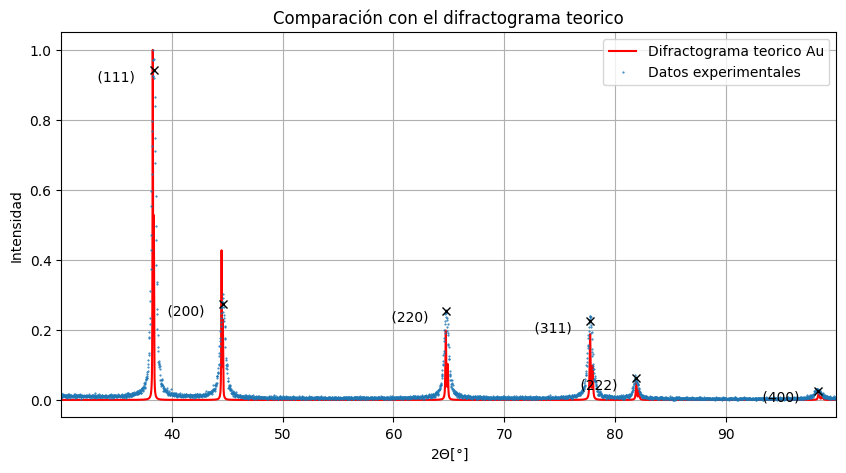

In [390]:
x_data_theo, y_data_theo = pf.read_xy_file2('Au.xy')

Au_h = np.array([1, 2, 2, 3, 2, 4])
Au_k = np.array([1, 0, 2, 1, 2, 0])
Au_l = np.array([1, 0, 0, 1, 2, 0])

miller_Index_Au = pf.concatenate_indices(Au_h, Au_k, Au_l)

plt.figure(figsize=(10, 5))

#plt.plot(x_data, I_aprox, '-', label='Mejor ajuste')
plt.plot(x_data_theo, y_data_theo, 'r-', label='Difractograma teorico Au')
plt.plot(x_data, y_data, 'o', label='Datos experimentales', markersize=0.5)

texts = []
for idx, label in zip(peaks_idx, miller_Index_Au):
    plt.plot(x_data[idx], y_data[idx], "kx")  #
    # Store text objects in a list for adjustment
    text = plt.text(x_data[idx], y_data[idx], ' {}'.format(label), color='black', ha='right', va='top')
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green'))

plt.xlim([np.min(x_data),np.max(x_data)])
plt.xlabel('$2\Theta [°]$')
plt.ylabel('Intensidad')
plt.title('Comparación con el difractograma teorico')
plt.grid()
plt.legend()
plt.show()

### Tamaño de la cristalita con Scherrer 

In [391]:
Cristalite, Cristalite_sizes = pf.PolyFit.Scherrer(angles,FWHM)

print(f'El tamaño de la cristalita es de {np.mean(Cristalite):.3f} nm')
print(f'desviacion estandar {np.std(Cristalite_sizes):.6f} nm')

El tamaño de la cristalita es de 21.488 nm
desviacion estandar 2.510306 nm


### Deformación con Halder Wagner

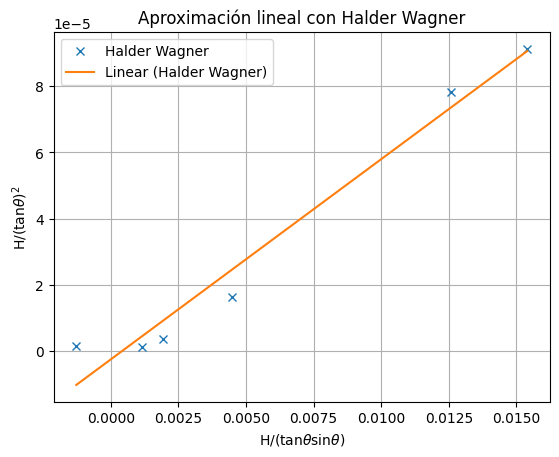

R^2: 0.9685364867422045
La defromación es de 0.040%
El tamaño de la cristalina es 25.485 nm


In [392]:
strain, size,R2 = pf.PolyFit.Halder_Wagner(angles,FWHM)

print("R^2:", R2)
print(f'La defromación es de {strain:.3f}%')
print(f'El tamaño de la cristalina es {size:.3f} nm')

### Implementación de Warren Averbach

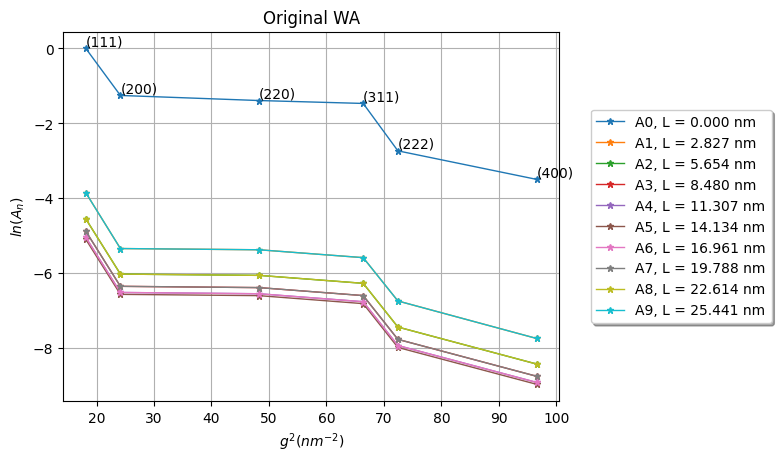

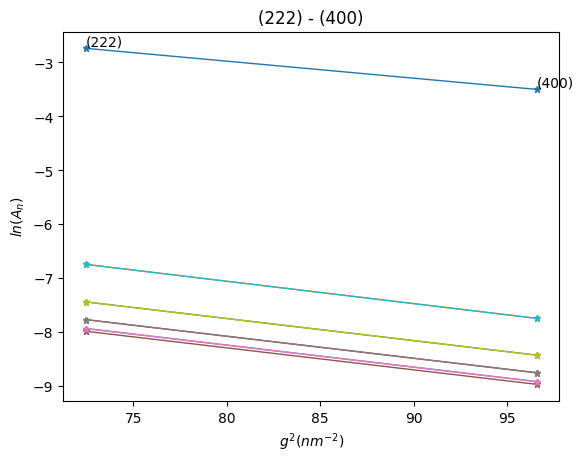

El porcentaje de deformación es de 0.669%


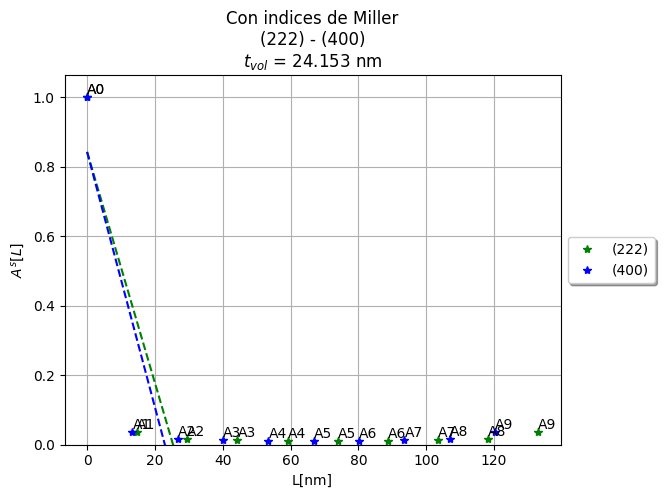

In [393]:
### Conociendo los indices de Miller y los parametros de Celda

x_Pv = np.linspace(np.min(x_data),np.max(x_data), num=8000)
y_Pv = pf.FitnessFunctions.model2(x_Pv, best_params,disp_array)

abc = np.array([4.07,4.07,4.07])*0.1 #Use nm
ABG = np.array([90,90,90])*np.pi/180 #For Warren Averbach module use rads
hkl = np.array([Au_h,Au_k,Au_l]) 

strain_pair = analysisUS4.Warren_Averbach(angles,FWHM, [4,5], hkl = hkl, ABG = ABG,abc = abc, x_data=x_Pv, y_data=y_Pv, n=10)
#analysisUS4.Warren_Averbach(angles,FWHM, [2,3],n=10)

strain = np.sqrt(np.mean(strain_pair[1:])) * 100
print(f'El porcentaje de deformación es de {strain:.3f}%')

In [394]:
### Sin conocer los indices de Miller y los parametros de Celda

# x_Pv = np.linspace(np.min(x_data),np.max(x_data), num=5000)
# y_Pv = pf.FitnessFunctions.model2(x_Pv, best_params,disp_array)

# abc = np.array([3.771,3.771,9.43])*0.1 #Use nm
# ABG = np.array([90,90,90])*np.pi/180 #For Warren Averbach module use rads
# hkl = np.array([Au_h,Au_k,Au_l]) 

# strain_pair = analysisUS4.Warren_Averbach(angles,FWHM, [3,4], x_data=x_Pv, y_data=y_Pv,n=10)
# #analysisUS4.Warren_Averbach(angles,FWHM, [2,3],n=10)

# strain = np.mean(strain_pair[1:]) * 100
# print(f'El porcentaje de deformación es de {strain:.3f}%')